# Final Exam - Antoine CHABERT - 273809

Fist name: Antoine

Last name: Chabert

SCIPER Number: 273809

First we import all we maybe need:

In [92]:
# Data pocessing
import pandas as pd
import numpy as np
from dateutil.parser import parse

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error


# Interactive viz
import folium
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
import nltk.data
import pycountry
import random
import re
from nltk.tokenize import TweetTokenizer

from collections import Counter
from gensim import models, corpora
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from os import path
from os.path import exists
from PIL import Image


# Utils
import json
import collections
import requests as rq
from bs4 import BeautifulSoup as bfs
import math
import scipy.stats as stats
from geopy.geocoders import GeoNames, Nominatim, GoogleV3
%matplotlib inline

First of all we import respective JSON file in a pandas dataframe:

In [2]:
epfl = pd.read_json('./epfl_en.json')
epfl.shape

(3208, 29)

In [3]:
ethz = pd.read_json('./eth_en.json')
ethz.shape

(2101, 29)

Then we make sample like asked:

In [4]:
def make_sample(df):
    return df[df['id'] % 10 == 9].copy()

In [5]:
epfl_sample = make_sample(epfl)
epfl_sample.shape

(123, 29)

In [6]:
ethz_sample = make_sample(ethz)
ethz_sample.shape

(74, 29)

We can see that the result is very small regarding original dataframes, we have less than 10% of the global dataframe.

## 1. Data Wrangling

First, check if IDs are really unique:

In [7]:
epfl['id'].is_unique

True

In [8]:
ethz['id'].is_unique

True

Set ID in index for better performances and manipulations:

In [9]:
epfl.set_index('id', inplace=True)

In [10]:
epfl_sample.set_index('id', inplace=True)

In [11]:
ethz.set_index('id', inplace=True)

In [12]:
ethz_sample.set_index('id', inplace=True)

Check null values:

In [13]:
epfl.isnull().sum()

contributors                 3208
coordinates                  3207
created_at                      0
entities                        0
extended_entities            2698
favorite_count                  0
favorited                       0
geo                          3207
id_str                          0
in_reply_to_screen_name      2919
in_reply_to_status_id        2976
in_reply_to_status_id_str    2976
in_reply_to_user_id          2919
in_reply_to_user_id_str      2919
is_quote_status                 0
lang                            0
place                        3167
possibly_sensitive            880
quoted_status                3191
quoted_status_id             3176
quoted_status_id_str         3176
retweet_count                   0
retweeted                       0
retweeted_status             2441
source                          0
text                            0
truncated                       0
user                            0
dtype: int64

In [14]:
epfl_sample.isnull().sum()

contributors                 123
coordinates                  123
created_at                     0
entities                       0
extended_entities            103
favorite_count                 0
favorited                      0
geo                          123
id_str                         0
in_reply_to_screen_name      114
in_reply_to_status_id        114
in_reply_to_status_id_str    114
in_reply_to_user_id          114
in_reply_to_user_id_str      114
is_quote_status                0
lang                           0
place                        120
possibly_sensitive            31
quoted_status                123
quoted_status_id             123
quoted_status_id_str         123
retweet_count                  0
retweeted                      0
retweeted_status             100
source                         0
text                           0
truncated                      0
user                           0
dtype: int64

In [15]:
ethz.isnull().sum()

contributors                 2101
coordinates                  2101
created_at                      0
entities                        0
extended_entities            1532
favorite_count                  0
favorited                       0
geo                          2101
id_str                          0
in_reply_to_screen_name      2057
in_reply_to_status_id        2083
in_reply_to_status_id_str    2083
in_reply_to_user_id          2057
in_reply_to_user_id_str      2057
is_quote_status                 0
lang                            0
place                        2101
possibly_sensitive            521
quoted_status                2021
quoted_status_id             2014
quoted_status_id_str         2014
retweet_count                   0
retweeted                       0
retweeted_status             1656
source                          0
text                            0
truncated                       0
user                            0
dtype: int64

In [16]:
ethz_sample.isnull().sum()

contributors                 74
coordinates                  74
created_at                    0
entities                      0
extended_entities            53
favorite_count                0
favorited                     0
geo                          74
id_str                        0
in_reply_to_screen_name      73
in_reply_to_status_id        74
in_reply_to_status_id_str    74
in_reply_to_user_id          73
in_reply_to_user_id_str      73
is_quote_status               0
lang                          0
place                        74
possibly_sensitive           22
quoted_status                73
quoted_status_id             73
quoted_status_id_str         73
retweet_count                 0
retweeted                     0
retweeted_status             61
source                        0
text                          0
truncated                     0
user                          0
dtype: int64

Like we can see, samples are very representating of 10% of the full dataset concerning null values.

Check types:

In [17]:
epfl.dtypes

contributors                        float64
coordinates                          object
created_at                   datetime64[ns]
entities                             object
extended_entities                    object
favorite_count                        int64
favorited                              bool
geo                                  object
id_str                                int64
in_reply_to_screen_name              object
in_reply_to_status_id               float64
in_reply_to_status_id_str           float64
in_reply_to_user_id                 float64
in_reply_to_user_id_str             float64
is_quote_status                        bool
lang                                 object
place                                object
possibly_sensitive                  float64
quoted_status                        object
quoted_status_id                    float64
quoted_status_id_str                float64
retweet_count                         int64
retweeted                       

In [18]:
ethz.dtypes

contributors                        float64
coordinates                         float64
created_at                   datetime64[ns]
entities                             object
extended_entities                    object
favorite_count                        int64
favorited                              bool
geo                                 float64
id_str                                int64
in_reply_to_screen_name              object
in_reply_to_status_id               float64
in_reply_to_status_id_str           float64
in_reply_to_user_id                 float64
in_reply_to_user_id_str             float64
is_quote_status                        bool
lang                                 object
place                               float64
possibly_sensitive                  float64
quoted_status                        object
quoted_status_id                    float64
quoted_status_id_str                float64
retweet_count                         int64
retweeted                       

Add user id in data:

In [19]:
epfl['user_id'] = epfl['user'].apply(lambda x: x['id'])
epfl_sample['user_id'] = epfl_sample['user'].apply(lambda x: x['id'])
ethz['user_id'] = ethz['user'].apply(lambda x: x['id'])
ethz_sample['user_id'] = ethz_sample['user'].apply(lambda x: x['id'])

In [20]:
epfl['user_id'].value_counts()

104604540    3208
Name: user_id, dtype: int64

In [21]:
ethz['user_id'].value_counts()

204279080    2101
Name: user_id, dtype: int64

After checking, we see that there is only one user account by dataset (epfl => @EPFL_en / ethz => @ETH_en).

Extract year, month, day and hour for every rows:

In [51]:
epfl['created_at_year'] = epfl['created_at'].apply(lambda x: x.year)
epfl['created_at_month'] = epfl['created_at'].apply(lambda x: x.month)
epfl['created_at_day'] = epfl['created_at'].apply(lambda x: x.day)
epfl['created_at_hour'] = epfl['created_at'].apply(lambda x: x.hour)

ethz['created_at_year'] = ethz['created_at'].apply(lambda x: x.year)
ethz['created_at_month'] = ethz['created_at'].apply(lambda x: x.month)
ethz['created_at_day'] = ethz['created_at'].apply(lambda x: x.day)
ethz['created_at_hour'] = ethz['created_at'].apply(lambda x: x.hour)

Extract hashtags by rows:

In [59]:
epfl['hashtags'] = epfl['entities'].apply(lambda x: [hashtag['text'] for hashtag in x['hashtags']])
ethz['hashtags'] = ethz['entities'].apply(lambda x: [hashtag['text'] for hashtag in x['hashtags']])

## 2. Descriptive statistics and plots

### Number of retweet and favorite

In [31]:
epfl_grouped_by_user = epfl[['user_id', 'favorited', 'favorite_count', 'retweeted', 'retweet_count', 'created_at']].groupby('user_id')
epfl_grouped_by_user.describe()

favorite_count  retweet_count
user_id                                       
104604540 count     3208.000000    3208.000000
          mean         1.192643       6.120324
          std          2.814000     112.535270
          min          0.000000       0.000000
          25%          0.000000       0.000000
          50%          0.000000       2.000000
          75%          1.000000       4.000000
          max         31.000000    6095.000000

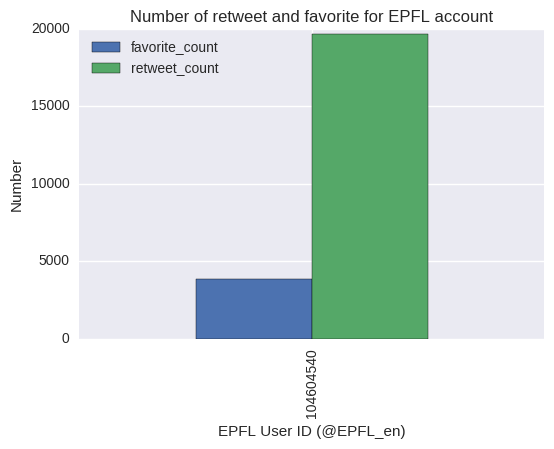

In [105]:
epfl_hist_count_retweet_favorite = epfl_grouped_by_user[['favorite_count', 'retweet_count']].sum().plot(kind='bar')
epfl_hist_count_retweet_favorite.set_ylabel('Number')
epfl_hist_count_retweet_favorite.set_xlabel('EPFL User ID (@EPFL_en)')
epfl_hist_count_retweet_favorite.set_title('Number of retweet and favorite for EPFL account')

In [32]:
ethz_grouped_by_user = ethz[['user_id', 'favorited', 'favorite_count', 'retweeted', 'retweet_count', 'created_at']].groupby('user_id')
ethz_grouped_by_user.describe()

favorite_count  retweet_count
user_id                                       
204279080 count     2101.000000    2101.000000
          mean         1.901000       3.970490
          std          3.298875      20.808402
          min          0.000000       0.000000
          25%          0.000000       1.000000
          50%          1.000000       2.000000
          75%          2.000000       4.000000
          max         33.000000     746.000000

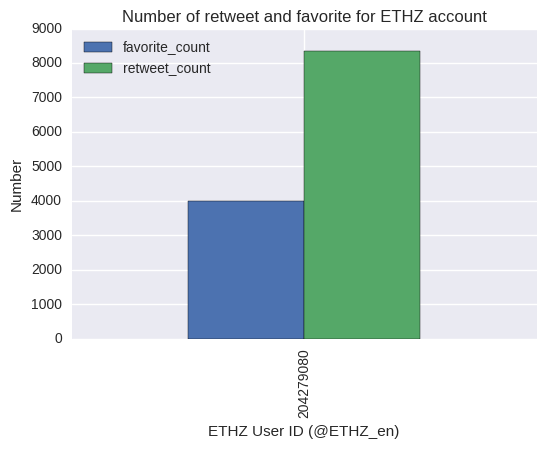

In [106]:
ethz_hist_count_retweet_favorite = ethz_grouped_by_user[['favorite_count', 'retweet_count']].sum().plot(kind='bar')
ethz_hist_count_retweet_favorite.set_ylabel('Number')
ethz_hist_count_retweet_favorite.set_xlabel('ETHZ User ID (@ETHZ_en)')
ethz_hist_count_retweet_favorite.set_title('Number of retweet and favorite for ETHZ account')

We can see that EPFL is more popular on twitter than ETHZ, because the number of retweet is really larger (2 twice more). By average, every tweet made by EPFL is retweeted 6 times, and ETHZ only 4. But in both cases, the number of favorites is the same, approximatly 4 000.

But, we also need to take care of the real difference between the number of tweet for the EPFL account (3208) and the number of tweet for the ETHZ account (2100), that can explain why EPFL is more popular (with the number of retweet).

### Evolution of number of retweet and favorite by year

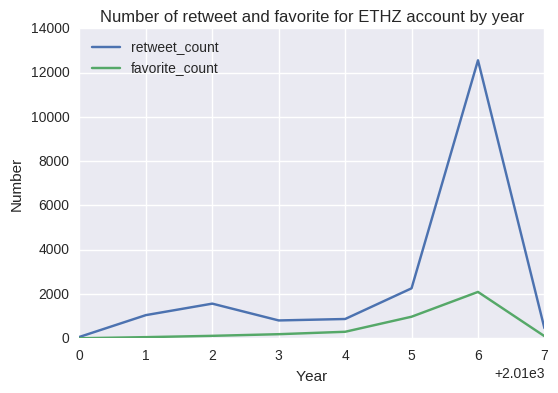

In [112]:
epfl_line_year_count_retweet_favorite = epfl[['created_at_year', 'retweet_count', 'favorite_count']].groupby('created_at_year').sum().plot(kind='line')
epfl_line_year_count_retweet_favorite.set_ylabel('Number')
epfl_line_year_count_retweet_favorite.set_xlabel('Year')
epfl_line_year_count_retweet_favorite.set_title('Number of retweet and favorite for ETHZ account by year')

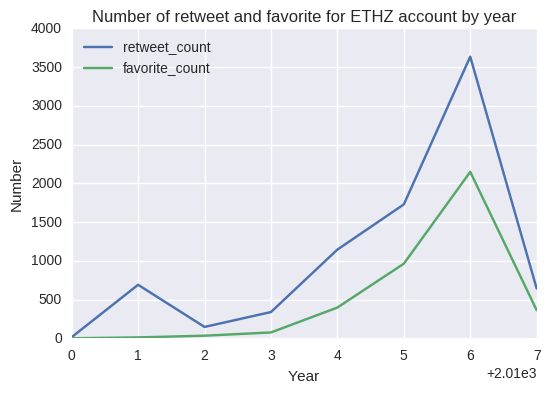

In [111]:
ethz_line_year_count_retweet_favorite = ethz[['created_at_year', 'retweet_count', 'favorite_count']].groupby('created_at_year').sum().plot(kind='line')
ethz_line_year_count_retweet_favorite.set_ylabel('Number')
ethz_line_year_count_retweet_favorite.set_xlabel('Year')
ethz_line_year_count_retweet_favorite.set_title('Number of retweet and favorite for ETHZ account by year')

We see that in both case, the number of favorite increase and decrease proportionaly with the number of retweet, some we can make the assumption, that the popularity can be deduce with the number of favorite or the number of retweet.

But we also see that, in the case of the EPFL, number of retweet make larger evolutions than the number of favorite.

Finally, we see that every year the total number increase, so schools tend to be more and more connected on tweeter to promote the school. 

**It is normal that 2017 are lower count than 2016, because the year just start.**

### Evolution of number of retweet and favorite by month

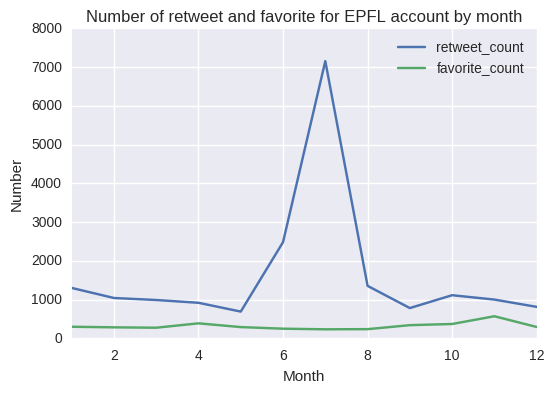

In [117]:
epfl_line_month_count_retweet_favorite = epfl[['created_at_month', 'retweet_count', 'favorite_count']].groupby('created_at_month').sum().plot(kind='line')
epfl_line_month_count_retweet_favorite.set_ylabel('Number')
epfl_line_month_count_retweet_favorite.set_xlabel('Month')
epfl_line_month_count_retweet_favorite.set_title('Number of retweet and favorite for EPFL account by month')

With EPFL, students seam to be more active during the summer than during the academic year regarding the number of retweet. We can made the assumption, that for a student it is easier to just make a favorite (take only few seconds) than a retweet. That can explain with during the academic year, student just favorite tweets, they just look at some tweet and not more, because they are more busy than during the summer.

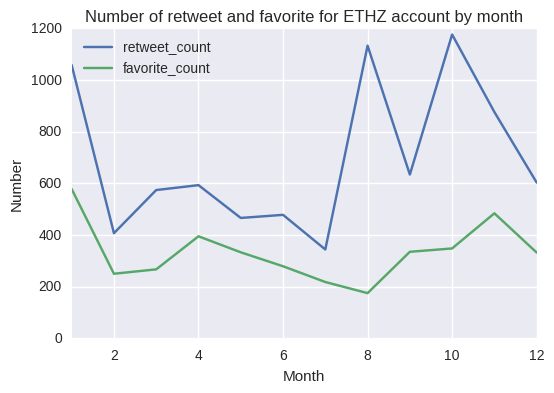

In [118]:
ethz_line_month_count_retweet_favorite = ethz[['created_at_month', 'retweet_count', 'favorite_count']].groupby('created_at_month').sum().plot(kind='line')
ethz_line_month_count_retweet_favorite.set_ylabel('Number')
ethz_line_month_count_retweet_favorite.set_xlabel('Month')
ethz_line_month_count_retweet_favorite.set_title('Number of retweet and favorite for ETHZ account by month')

For ETHZ, the fenomena EPFL is also visible, but the also see that during the first semester, users are more active.

We also can make an hypothesis, that the first semester is a little bit the continuation of the summer holiday, but after results of the first semester, student realized that they don't work enough and let tweeter by side.

### Evolution of number of retweet and favorite by hour

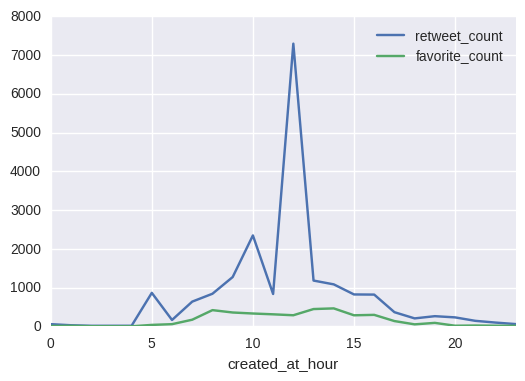

In [52]:
epfl_line__count_retweet_favorite = epfl[['created_at_hour', 'retweet_count', 'favorite_count']].groupby('created_at_hour').sum().plot(kind='line')
ethz_line_month_count_retweet_favorite.set_ylabel('Number')
ethz_line_month_count_retweet_favorite.set_xlabel('Month')
ethz_line_month_count_retweet_favorite.set_title('Number of retweet and favorite for ETHZ account by month')

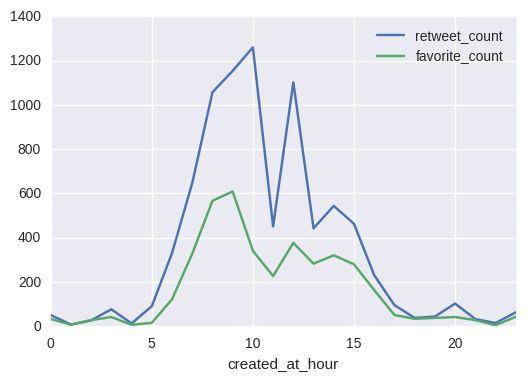

In [53]:
ethz[['created_at_hour', 'retweet_count', 'favorite_count']].groupby('created_at_hour').sum().plot(kind='line')

We see in both graphics the real activity of comunication manager from both schools. There are retweet and favorite only when there are tweet (obliously). SO the number increase only during the day. But we also see two patterns:
 - When students are in a break (like at 12h), the number increase, so student check their tweeter account.
 - During the end of the day, student do also the same, but there is less activities because communication maangers are not here to tweet.
 
Note: in the ETHZ graph, we also see thaht during the morning, it is a little bit harder to work, so they also check more ofter their tweeter account than at EPFL

### Hashtags

In [61]:
#epfl[['hashtags', 'retweet_count', 'favorite_count']].groupby('hashtags').sum().plot(kind='line')

## 3. Maching learning

## 4. Topics

First we define some usefull functions from our homework:

In [93]:
SENTENCES_DETECTOR = nltk.data.load('tokenizers/punkt/english.pickle')
TWEET_TOKENIZER = TweetTokenizer()

def create_corpus(content, processed=False):
    '''
    This function create a corpus given a content.

    Parameters
        - content  : content to be used to create the corpus (string)
        - processed: boolean which indicates if content was already processed or not (False by default)

    Return
        - corpus : created corpus for given content
        - id2word: dictionary containing ids and associated words
    '''

    # Creation of the dictionary (if content was not processed) using all the retrieved sentences
    if not processed:
        all_text_array = [[word for word in sentence.lower().split() if word not in stopwords.words('english')] for sentence in content]
    else:
        all_text_array = content

    dictionary = corpora.Dictionary(all_text_array)
    
    # Creation of links between ids and words for better readability
    id2word = {}
    for word in dictionary.token2id:    
        id2word[dictionary.token2id[word]] = word

    # Creation of the corpus
    corpus = [dictionary.doc2bow(text) for text in all_text_array]

    return corpus, id2word

def create_lda_model(corpus, id2word, nb_topics=5):
    '''
    This function creates a LDA model given a corpus.

    Parameters
        - corpus : corpus to be used
        - id2word: dictionary containing ids and associated words

    Return
        - lda: LDA model
    '''

    lda = models.LdaModel(corpus, id2word=id2word, num_topics=nb_topics)
    return lda

#### EPFL Topics

Then, we try with raw text to find topics:

**We only focus on 10 topics, but this process can be executed with more or less**

In [97]:
epfl_raw_text = epfl['text']

epfl_corpus, epfl_id2word = create_corpus(epfl_raw_text)
epfl_lda_5_topics_raw = create_lda_model(epfl_corpus, epfl_id2word, 10)
epfl_lda_5_topics_raw.print_topics()

[(0,
  '0.023*rt + 0.020*epfl + 0.012*- + 0.008*... + 0.007*thanks + 0.005*#epfl + 0.005*via + 0.004*swiss + 0.004*new + 0.004*!'),
 (1,
  '0.020*rt + 0.011*epfl + 0.005*blanke + 0.004*#epfl + 0.004*olaf + 0.004*le + 0.004*new + 0.003*project + 0.003*@epfl + 0.003*de'),
 (2,
  '0.026*rt + 0.009*epfl + 0.009*... + 0.008*@epfl + 0.008*brain + 0.007*- + 0.006*#epfl + 0.006*computer + 0.005*new + 0.005*:)'),
 (3,
  '0.026*rt + 0.016*- + 0.007*#epfl + 0.007*epfl + 0.007*millan + 0.006*new + 0.006*@epfl + 0.005*@epfl_en + 0.005*#aaasmtg + 0.005*jose'),
 (4,
  "0.029*thanks + 0.024*mention! + 0.011*new + 0.011*epfl + 0.010*rt + 0.008*- + 0.005*robots + 0.004*energy + 0.003*@epfl_en + 0.003*epfl's"),
 (5,
  "0.027*rt + 0.010*@epfl + 0.006*epfl + 0.006*@epfl_en + 0.005*... + 0.005*don't + 0.004*miss + 0.004*thanks! + 0.004*#epfl + 0.004*-"),
 (6,
  '0.028*rt + 0.010*... + 0.010*epfl + 0.009*#epfl + 0.009*@epfl + 0.007*new + 0.006*- + 0.006*2012 + 0.006*| + 0.004*mind'),
 (7,
  '0.018*epfl + 0.0

In [98]:
epfl_sample_raw_text = epfl_sample['text']

epfl_sample_corpus, epfl_sample_id2word = create_corpus(epfl_sample_raw_text)
epfl_sample_lda_5_topics_raw = create_lda_model(epfl_sample_corpus, epfl_sample_id2word, 10)
epfl_sample_lda_5_topics_raw.print_topics()

[(0,
  '0.015*epfl + 0.012*rt + 0.008*innovation + 0.008*news + 0.008*#aaasmtg + 0.008*highlights + 0.006*project + 0.004*air + 0.004*#epfl + 0.004*thanks'),
 (1,
  "0.017*rt + 0.012*#epfl + 0.008*epfl + 0.008*cells + 0.008*#startup + 0.008*epfl's + 0.008*send + 0.008*real-time + 0.008*data + 0.005*power"),
 (2,
  '0.024*rt + 0.010*epfl + 0.010*swiss + 0.005*@epfl + 0.005*#epfl + 0.005*via + 0.005*science + 0.005*world + 0.005*3 + 0.005*8th,'),
 (3,
  '0.015*epfl + 0.015*- + 0.010*new + 0.010*thanks + 0.006*@epfl + 0.005*#epflsondage + 0.005*submit + 0.005*tickets + 0.005*#moocs + 0.005*emerging'),
 (4,
  '0.019*rt + 0.018*@epfl + 0.008*new + 0.006*#epfl + 0.006*#science + 0.006*stéphanie + 0.006*lacour + 0.006*difference + 0.006*#businessmodel + 0.006*lausanne,'),
 (5,
  "0.027*rt + 0.010*two + 0.010*research + 0.007*epfl + 0.007*@epfl + 0.007*living + 0.007*@upmicblog: + 0.004*3 + 0.004*#epfl + 0.004*epfl's"),
 (6,
  '0.023*rt + 0.013*@epfl_en + 0.013*around + 0.009*new + 0.009*antar

Like we can see there are a lot of strange words (like hashtag or 'rt'). We try now with specific tokenizer for tweets:

In [101]:
epfl_sentences = TWEET_TOKENIZER.tokenize(' '.join(epfl_raw_text).strip())
epfl_corpus_clean, epfl_id2word_clean = create_corpus(epfl_sentences)
epfl_lda_5_topics_clean = create_lda_model(epfl_corpus_clean, epfl_id2word_clean, 10)
epfl_lda_5_topics_clean.print_topics()

[(0,
  '0.061*" + 0.017*students + 0.015*@swissnexsf + 0.013*future + 0.013*news + 0.011*blanke + 0.011*switzerland + 0.011*check + 0.011*live + 0.010*scientists'),
 (1,
  '0.196*rt + 0.019*research + 0.013*cells + 0.008*space + 0.008*meeting + 0.008*scala + 0.007*brain-computer + 0.007*like + 0.006*years + 0.006*day'),
 (2,
  '0.159*. + 0.036*) + 0.031*science + 0.018*robots + 0.017*project + 0.016*solar + 0.014*mind + 0.010*lausanne + 0.010*robot + 0.009*first'),
 (3,
  "0.082*! + 0.067*#epfl + 0.038*@epfl + 0.026*center + 0.020*epfl's + 0.020*/ + 0.016*today + 0.013*mention + 0.011*aaas + 0.010*jose"),
 (4,
  '0.062*... + 0.017*millan + 0.017*@epflnews + 0.011*@epfl_en + 0.011*#bci + 0.011*prof + 0.009*olaf + 0.009*miss + 0.008*http + 0.008*%'),
 (5,
  "0.193*, + 0.021*' + 0.016*great + 0.012*body + 0.008*virtual + 0.008*w + 0.007*geneva + 0.007*take + 0.007*may + 0.007*magazine"),
 (6,
  "0.160*epfl + 0.059*? + 0.043*new + 0.016*rolex + 0.015*via + 0.014*researchers + 0.010*don't +

We still can extra some topics, for example we take the full epfl dateset topics:
 0. Related to switzerland
 1. Related to research
 2. Related to some projects
 3. Related to EPFL school
 4. Not really relevant
 ...

But like we saw in homework, this topics are not great, it is better to analyse this by a humain than an algorithm.

In [102]:
epfl_sample_sentences = TWEET_TOKENIZER.tokenize(' '.join(epfl_sample_raw_text).strip())
epfl_sample_corpus_clean, epfl_sample_id2word_clean = create_corpus(epfl_sample_sentences)
epfl_sample_lda_5_topics_clean = create_lda_model(epfl_sample_corpus_clean, epfl_sample_id2word_clean, 10)
epfl_sample_lda_5_topics_clean.print_topics()

[(0,
  '0.035*epfl + 0.017*new + 0.009*? + 0.009*living + 0.009*scientists + 0.009*geneva + 0.009*send + 0.009*3 + 0.009*develop + 0.009*follow'),
 (1,
  '0.034*@epfl + 0.019*… + 0.012*thanks + 0.012*science + 0.012*answer + 0.012*cells + 0.008*years + 0.008*center + 0.008*#moocs + 0.008*neuroscience'),
 (2,
  '0.082*, + 0.073*: + 0.073*. + 0.019*’ + 0.016*" + 0.016*new + 0.013*@epfl_en + 0.013*#aaasmtg + 0.013*two + 0.010*@epfl'),
 (3,
  "0.014*: + 0.014*@epfl_en + 0.010*thanks + 0.010*first + 0.010*design + 0.010*people + 0.010*/ + 0.010*' + 0.010*images + 0.010*@epflnews"),
 (4,
  '0.058*! + 0.029*#epfl + 0.013*@epfl_en + 0.009*: + 0.009*? + 0.009*… + 0.009*@ + 0.009*... + 0.009*solar + 0.009*@solarimpulse'),
 (5,
  '0.117*rt + 0.031*, + 0.016*? + 0.016*world + 0.016*" + 0.012*#energy + 0.012*swiss + 0.012*start-up + 0.010*) + 0.008*@epfl'),
 (6,
  '0.024*via + 0.014*" + 0.010*thanks + 0.010*things + 0.010*@eth_en + 0.010*special + 0.010*@epfllive + 0.010*hello + 0.010*move + 0.010*

Topics with samples are really differnts, there is a lot of disturbing words, that are masked by more relevant other word in the full EPFL dataset. So, keep the most data possible to make this better because this improve links possible between words and make better topics.

**The result is a little bit better, but and extra pre-processing in order to remove ponctuation or specifics word related to twitter is needed.**